<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_NLP_Vectorization_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random

# Define intents and a set of varied templates per intent
intents = {
    "account_blocked": [
        "Why can't I access my account?",
        "My account is locked. Please help.",
        "I got blocked out of my account today.",
        "Why is my account restricted all of a sudden?",
        "The app says my account is blocked. What can I do?"
    ],
    "card_declined": [
        "My card was just declined at the store.",
        "Why is my payment not going through?",
        "Every time I swipe my card, it gets declined.",
        "I tried to pay online but the card didn’t work.",
        "The machine keeps rejecting my card."
    ],
    "atm_support": [
        "The ATM ate my card. What now?",
        "I need help withdrawing money from the ATM.",
        "The ATM said there was an error with my account.",
        "Is there a fee for using another bank’s ATM?",
        "The ATM didn't give me my cash. What should I do?"
    ],
    "order_status": [
        "What’s the status of my recent order?",
        "Has my package been shipped yet?",
        "Where is my delivery?",
        "Can you update me on my order progress?",
        "I placed an order and haven't received an update."
    ],
    "international_fees": [
        "Was I charged an international transaction fee?",
        "Why is there a foreign fee on my statement?",
        "How much does it cost to use my card abroad?",
        "Are there charges when spending in another currency?",
        "I see extra charges from using my card overseas."
    ]
}

# Generate 1000 examples, 200 per intent
generated_data = []
for label, phrases in intents.items():
    for _ in range(200):
        # Randomly select a phrase and slightly vary it
        base = random.choice(phrases)
        variation = random.choice([
            base,
            base.lower(),
            base.replace("?", "").strip() + "?",
            base.replace(".", ""),
            base + " Please advise.",
            "Hey, " + base[0].lower() + base[1:]
        ])
        generated_data.append((variation.strip(), label))

# Shuffle the dataset
random.shuffle(generated_data)

# Convert to DataFrame
df_train = pd.DataFrame(generated_data, columns=["text", "intent"])
df_train.head()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(df_train["text"])
y = df_train["intent"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Classification report with zero_division to suppress warnings
report_tfidf = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")
X_embed = model.encode(df_train["text"].tolist(), show_progress_bar=False)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_embed, y, test_size=0.2, random_state=42, stratify=y)
clf_embed = LogisticRegression(max_iter=1000)
clf_embed.fit(X_train_e, y_train_e)
y_pred_e = clf_embed.predict(X_test_e)

# Embedding classification report
report_embed = classification_report(y_test_e, y_pred_e, output_dict=True, zero_division=0)

# Combine reports
report_df = pd.DataFrame(report_tfidf).transpose().add_prefix('TFIDF_')
report_embed_df = pd.DataFrame(report_embed).transpose().add_prefix('EMBED_')
final_report = pd.concat([report_df, report_embed_df], axis=1)

# Display the report
from IPython.display import display
display(final_report)  # This works in Jupyter/Colab

# Or, just:
print(final_report.head())  # For quick terminal view


,TFIDF_precision,TFIDF_recall,TFIDF_f1-score,TFIDF_support,EMBED_precision,EMBED_recall,EMBED_f1-score,EMBED_support
account_blocked,1.0,1.0,1.0,40.0,1.0,1.0,1.0,40.0
atm_support,1.0,1.0,1.0,40.0,1.0,1.0,1.0,40.0
card_declined,1.0,1.0,1.0,40.0,1.0,1.0,1.0,40.0
international_fees,1.0,1.0,1.0,40.0,1.0,1.0,1.0,40.0
order_status,1.0,1.0,1.0,40.0,1.0,1.0,1.0,40.0
accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,200.0,1.0,1.0,1.0,200.0
weighted avg,1.0,1.0,1.0,200.0,1.0,1.0,1.0,200.0


                    TFIDF_precision  TFIDF_recall  TFIDF_f1-score  \
account_blocked                 1.0           1.0             1.0   
atm_support                     1.0           1.0             1.0   
card_declined                   1.0           1.0             1.0   
international_fees              1.0           1.0             1.0   
order_status                    1.0           1.0             1.0   

                    TFIDF_support  EMBED_precision  EMBED_recall  \
account_blocked              40.0              1.0           1.0   
atm_support                  40.0              1.0           1.0   
card_declined                40.0              1.0           1.0   
international_fees           40.0              1.0           1.0   
order_status                 40.0              1.0           1.0   

                    EMBED_f1-score  EMBED_support  
account_blocked                1.0           40.0  
atm_support                    1.0           40.0  
card_declined       

In [8]:
import random
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer
from IPython.display import display

# 1. Clean templates
intents = {
    "account_blocked": [
        "Why can't I access my account?",
        "My account is locked. Please help.",
        "I got blocked out of my account today.",
        "Why is my account restricted all of a sudden?",
        "The app says my account is blocked. What can I do?"
    ],
    "card_declined": [
        "My card was just declined at the store.",
        "Why is my payment not going through?",
        "Every time I swipe my card, it gets declined.",
        "I tried to pay online but the card didn’t work.",
        "The machine keeps rejecting my card."
    ],
    "atm_support": [
        "The ATM ate my card. What now?",
        "I need help withdrawing money from the ATM.",
        "The ATM said there was an error with my account.",
        "Is there a fee for using another bank’s ATM?",
        "The ATM didn't give me my cash. What should I do?"
    ],
    "order_status": [
        "What’s the status of my recent order?",
        "Has my package been shipped yet?",
        "Where is my delivery?",
        "Can you update me on my order progress?",
        "I placed an order and haven't received an update."
    ],
    "international_fees": [
        "Was I charged an international transaction fee?",
        "Why is there a foreign fee on my statement?",
        "How much does it cost to use my card abroad?",
        "Are there charges when spending in another currency?",
        "I see extra charges from using my card overseas."
    ]
}

# 2. Generate 1000 clean examples
clean_data = []
for label, phrases in intents.items():
    for _ in range(200):
        base = random.choice(phrases)
        variation = random.choice([
            base,
            base.lower(),
            base.replace("?", "").strip() + "?",
            base.replace(".", ""),
            base + " Please advise.",
            "Hey, " + base[0].lower() + base[1:]
        ])
        clean_data.append((variation.strip(), label))

# 3. Add 50 noisy examples (10 per class)
noise_templates = {
    "account_blocked": [
        "accnt locked cant get in",
        "my acc blockd help!!!",
        "locked out?? no warnin",
        "blocked... fix it 😡",
        "idk why but my account blocked now"
    ],
    "card_declined": [
        "card didnt wrk at gas station",
        "my 💳 got rejected 2x today",
        "cant buy stuff, card = fail",
        "keeps sayn declined wtf",
        "no clue why card not workin"
    ],
    "atm_support": [
        "atm ate my card lol now what?",
        "got error withdrawing cash 😤",
        "atm froze on me mid transaction",
        "help atm messed up",
        "tried 2 get $ but nthng came out"
    ],
    "order_status": [
        "wher my order???",
        "i paid but no package yet",
        "when it coming??",
        "can u check my shippment plz",
        "still waiting on what i ordered"
    ],
    "international_fees": [
        "extra fee 4 travel??",
        "why tf they charge foreign fee",
        "paid in euro now more $$?",
        "charges when i use abroad? 🤔",
        "idk some intl fee showed up"
    ]
}

noisy_data = []
for label, phrases in noise_templates.items():
    for _ in range(10):
        noisy_data.append((random.choice(phrases), label))

# 4. Confusing samples (harder, realistic)
confusing_samples = [
    ("I can’t make a payment and don’t know why", "card_declined"),
    ("The payment went through but no update on delivery", "order_status"),
    ("Why was I charged extra yesterday?", "international_fees"),
    ("The machine said error but didn’t tell me why", "atm_support"),
    ("Everything looks fine but my account is acting weird", "account_blocked"),
    ("Got declined at the store and now I can’t log in", "account_blocked"),
    ("I tried to withdraw money, it didn’t come out and card said declined", "atm_support"),
    ("I paid in a foreign currency, but the item never came", "international_fees"),
    ("There’s a weird charge and my card stopped working", "card_declined"),
    ("Order placed but bank flagged my transaction", "order_status"),
    ("Just got blocked for no reason while trying to buy something", "account_blocked"),
    ("Fee for something I don’t remember buying overseas", "international_fees"),
    ("Why no confirmation and also got charged again", "order_status"),
    ("No cash from ATM and card is locked now", "atm_support"),
    ("Is there a reason for that extra fee last night?", "international_fees"),
    ("Card rejected, refund pending, account still okay?", "card_declined"),
    ("Money gone, no product, card didn’t fail", "order_status"),
    ("I can't log in and got charged something weird", "account_blocked"),
    ("ATM refused card and now online shows error", "atm_support"),
    ("Card didn’t swipe, fee showed up, nothing arrived", "card_declined")
]
confusing_df = pd.DataFrame(confusing_samples, columns=["text", "intent"])

df_all = pd.DataFrame(clean_data + noisy_data, columns=["text", "intent"])
df_augmented_confused = pd.concat([df_all, confusing_df], ignore_index=True).sample(frac=1, random_state=42)

# Ready for vectorization & modeling
df_augmented_confused.head()

# 5. TF-IDF training
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(df_all["text"])
y = df_all["intent"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

report_tfidf = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# 6. Sentence-BERT embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
X_embed = model.encode(df_all["text"].tolist(), show_progress_bar=False)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_embed, y, test_size=0.2, random_state=42, stratify=y)
clf_embed = LogisticRegression(max_iter=1000)
clf_embed.fit(X_train_e, y_train_e)
y_pred_e = clf_embed.predict(X_test_e)

report_embed = classification_report(y_test_e, y_pred_e, output_dict=True, zero_division=0)

# 7. Combine and display results
report_df = pd.DataFrame(report_tfidf).transpose().add_prefix('TFIDF_')
report_embed_df = pd.DataFrame(report_embed).transpose().add_prefix('EMBED_')
final_report = pd.concat([report_df, report_embed_df], axis=1)

display(final_report)
print(final_report.head())


,TFIDF_precision,TFIDF_recall,TFIDF_f1-score,TFIDF_support,EMBED_precision,EMBED_recall,EMBED_f1-score,EMBED_support
account_blocked,1.000000,0.952381,0.975610,42.000000,1.0,1.0,1.0,42.0
atm_support,1.000000,1.000000,1.000000,42.000000,1.0,1.0,1.0,42.0
card_declined,1.000000,1.000000,1.000000,42.000000,1.0,1.0,1.0,42.0
international_fees,0.954545,1.000000,0.976744,42.000000,1.0,1.0,1.0,42.0
order_status,1.000000,1.000000,1.000000,42.000000,1.0,1.0,1.0,42.0
accuracy,0.990476,0.990476,0.990476,0.990476,1.0,1.0,1.0,1.0
macro avg,0.990909,0.990476,0.990471,210.000000,1.0,1.0,1.0,210.0
weighted avg,0.990909,0.990476,0.990471,210.000000,1.0,1.0,1.0,210.0


                    TFIDF_precision  TFIDF_recall  TFIDF_f1-score  \
account_blocked            1.000000      0.952381        0.975610   
atm_support                1.000000      1.000000        1.000000   
card_declined              1.000000      1.000000        1.000000   
international_fees         0.954545      1.000000        0.976744   
order_status               1.000000      1.000000        1.000000   

                    TFIDF_support  EMBED_precision  EMBED_recall  \
account_blocked              42.0              1.0           1.0   
atm_support                  42.0              1.0           1.0   
card_declined                42.0              1.0           1.0   
international_fees           42.0              1.0           1.0   
order_status                 42.0              1.0           1.0   

                    EMBED_f1-score  EMBED_support  
account_blocked                1.0           42.0  
atm_support                    1.0           42.0  
card_declined       

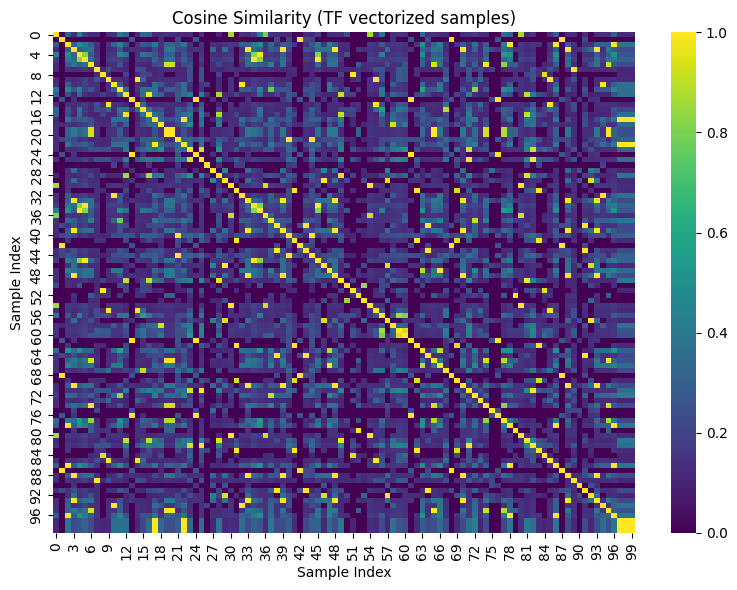

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Binarizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Use the full dataset for all vectorization types
texts = df_augmented_confused["text"]
labels = df_augmented_confused["intent"]

# Binary vectorization (presence/absence of words)
binary_vectorizer = CountVectorizer(binary=True)
X_binary = binary_vectorizer.fit_transform(texts)

# Term Frequency (raw counts)
tf_vectorizer = CountVectorizer()
X_tf = tf_vectorizer.fit_transform(texts)

# Inverse Document Frequency (manual)
word_counts = (X_tf > 0).sum(axis=0)
idf_manual = np.log((1 + len(texts)) / (1 + word_counts)).A1  # Add-1 smoothing
idf_dict = dict(zip(tf_vectorizer.get_feature_names_out(), idf_manual))

# TF-IDF (Sklearn built-in)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Distance comparison on a small slice
sample_slice = slice(0, 100)
euclidean_tf = euclidean_distances(X_tf[sample_slice])
cosine_tf = cosine_similarity(X_tf[sample_slice])

# Visualize cosine similarity (heatmap for 100 samples)
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_tf, cmap="viridis")
plt.title("Cosine Similarity (TF vectorized samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Step 2: Stopword Management

# Show a few common stopwords
stopwords_sample = list(ENGLISH_STOP_WORDS)[:10]

# Vectorization with and without stopwords removed
vectorizer_with_stopwords = TfidfVectorizer()
vectorizer_without_stopwords = TfidfVectorizer(stop_words='english')

X_with = vectorizer_with_stopwords.fit_transform(texts)
X_without = vectorizer_without_stopwords.fit_transform(texts)

# Compare vocabulary sizes
vocab_size_with = len(vectorizer_with_stopwords.get_feature_names_out())
vocab_size_without = len(vectorizer_without_stopwords.get_feature_names_out())

# Example impact on a sentence
example_sentence = ["The ATM did not give me my cash."]
vec_with = vectorizer_with_stopwords.transform(example_sentence)
vec_without = vectorizer_without_stopwords.transform(example_sentence)

{
    "stopwords_sample": stopwords_sample,
    "vocab_size_with_stopwords": vocab_size_with,
    "vocab_size_without_stopwords": vocab_size_without,
    "nonzero_features_with": vec_with.nnz,
    "nonzero_features_without": vec_without.nnz
}



{'stopwords_sample': ['empty',
  'around',
  'move',
  'everyone',
  'no',
  'being',
  'well',
  'everything',
  'sixty',
  'a'],
 'vocab_size_with_stopwords': 191,
 'vocab_size_without_stopwords': 132,
 'nonzero_features_with': 7,
 'nonzero_features_without': 2}

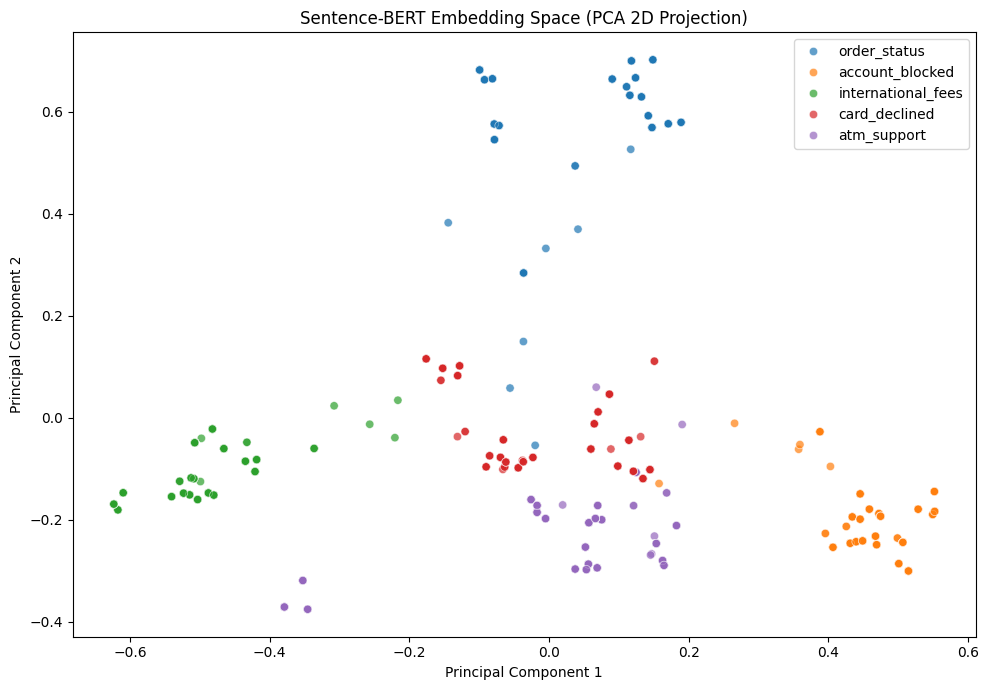

In [13]:
from sklearn.decomposition import PCA

# Step 3: Text Embeddings (Sentence-BERT was already loaded before)
# Reuse df_augmented_confused for consistent text samples
texts = df_augmented_confused["text"].tolist()
labels = df_augmented_confused["intent"]

# Generate dense embeddings
sentence_embeddings = model.encode(texts, show_progress_bar=False)

# Reduce dimensionality for visualization (2D projection with PCA)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

# Put into a DataFrame for plotting
embed_df = pd.DataFrame({
    "x": reduced_embeddings[:, 0],
    "y": reduced_embeddings[:, 1],
    "intent": labels
})

# Plot embedding space
plt.figure(figsize=(10, 7))
sns.scatterplot(data=embed_df, x="x", y="y", hue="intent", palette="tab10", alpha=0.7)
plt.title("Sentence-BERT Embedding Space (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()
